Импрот библиотек

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Выбор датасета
2 - четный вариант - о вине))

In [ ]:
data = pd.read_csv("/content/WineDataset.csv")
data

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


#Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

Так как у нас отсутствуют NaN и иные виды пустых значений (согласно описанию датасета), а также отсутствуют категориальные признаки, то мы просто масштабируем наши данные

In [ ]:
scaler = StandardScaler()

X_data = data.drop(['Wine'], axis=1)
y_data = data['Wine']

X_data = scaler.fit_transform(X_data)

#Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.

In [ ]:
data.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


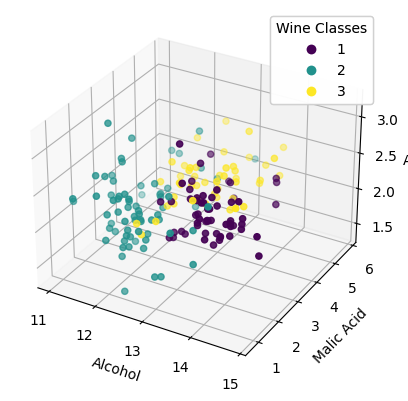

In [ ]:
feature1 = 'Alcohol'
feature2 = 'Malic Acid'
feature3 = 'Ash'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data[feature1], data[feature2], data[feature3], c=data['Wine'], cmap='viridis', marker='o')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)

legend = ax.legend(*scatter.legend_elements(), title='Wine Classes')

ax.add_artist(legend)

plt.show()

#Реализуйте метод k-ближайших соседей

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            prediction = np.bincount(k_nearest_labels).argmax()
            predictions.append(prediction)
        return np.array(predictions)

    def score(self, y_predicted, y_true):
        return np.mean(y_predicted == y_true)

#Постройте две модели k-NN с различными наборами признаков

In [ ]:
RANDOM_STATE = 0
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=RANDOM_STATE)
X_train = np.array(X_train)
y_train = np.array(y_train)

##Модель 1: Признаки случайно отбираются

In [ ]:
def select_random_features(X, num_features):
    num_total_features = X.shape[1]
    selected_features = np.random.choice(range(num_total_features), size=num_features, replace=False)
    return selected_features

In [ ]:
random_features = select_random_features(X_train, num_features=5)
X_train_random = X_train[random_features]
X_test_random = X_test[random_features]

SyntaxError: ignored

Accuracy: 0.4166666666666667


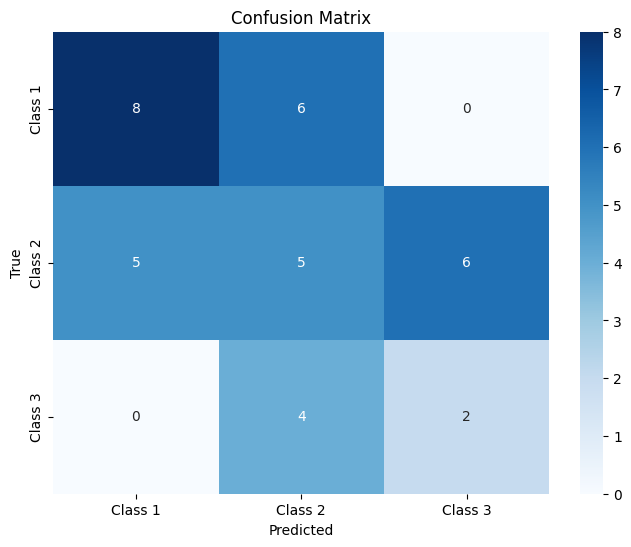

In [ ]:
knn_model = KNN(k=3)
knn_model.fit(X_train_random, y_train)

y_predicted = knn_model.predict(X_test_random)

print(f"Accuracy: {knn_model.score(y_predicted, y_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.4166666666666667


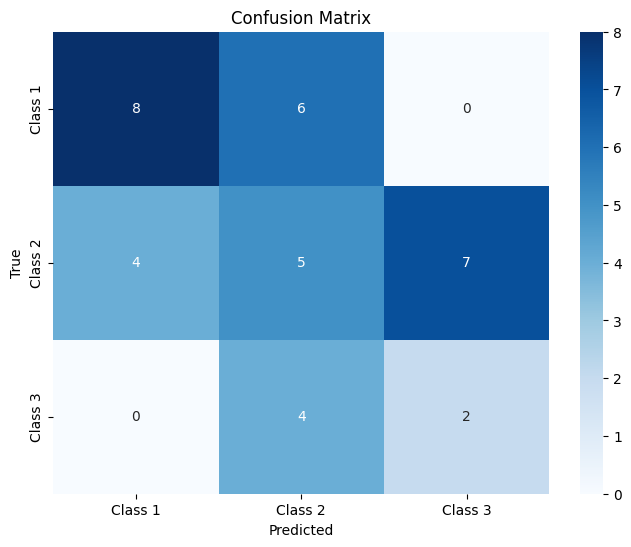

In [ ]:
knn_model = KNN(k=5)
knn_model.fit(X_train_random, y_train)

y_predicted = knn_model.predict(X_test_random)

print(f"Accuracy: {knn_model.score(y_predicted, y_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.4166666666666667


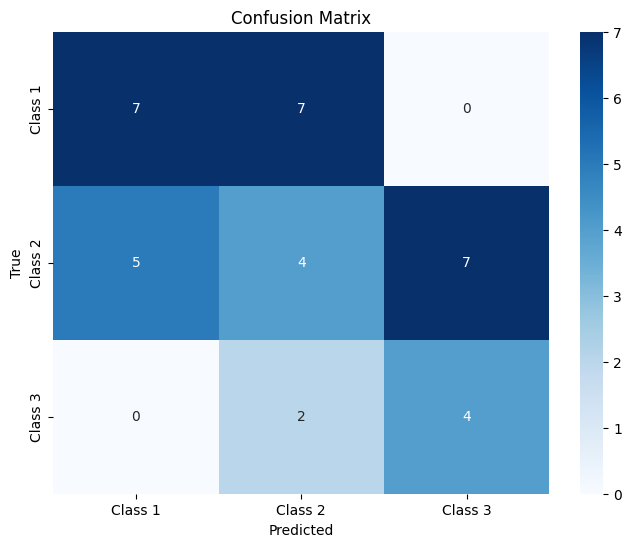

In [ ]:
knn_model = KNN(k=10)
knn_model.fit(X_train_random, y_train)

y_predicted = knn_model.predict(X_test_random)

print(f"Accuracy: {knn_model.score(y_predicted, y_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##Модель 2: Фиксированный набор признаков, который выбирается заранее.

Accuracy: 0.9444444444444444


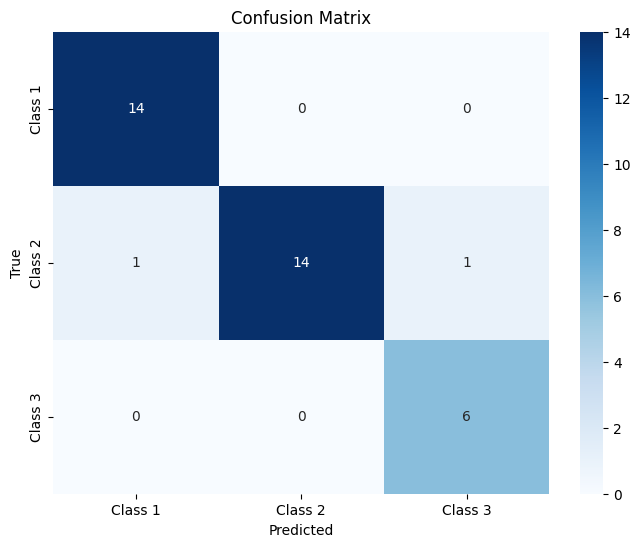

In [ ]:
knn_model = KNN(k=3)
knn_model.fit(X_train, y_train)

y_predicted = knn_model.predict(X_test)

print(f"Accuracy: {knn_model.score(y_predicted, y_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9722222222222222


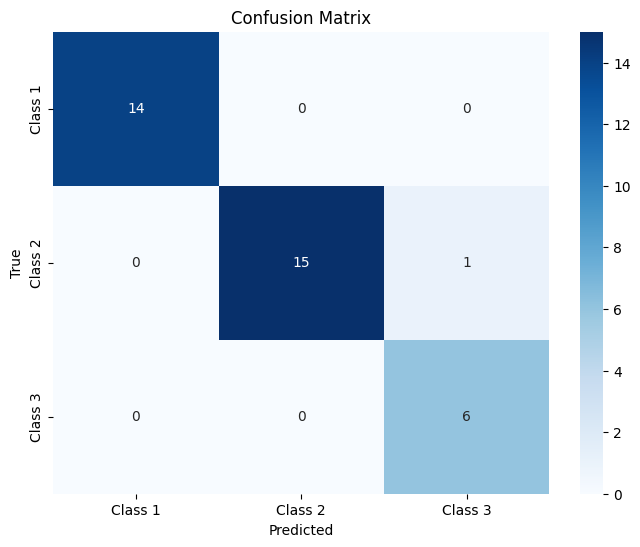

In [ ]:
knn_model = KNN(k=5)
knn_model.fit(X_train, y_train)

y_predicted = knn_model.predict(X_test)

print(f"Accuracy: {knn_model.score(y_predicted, y_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0


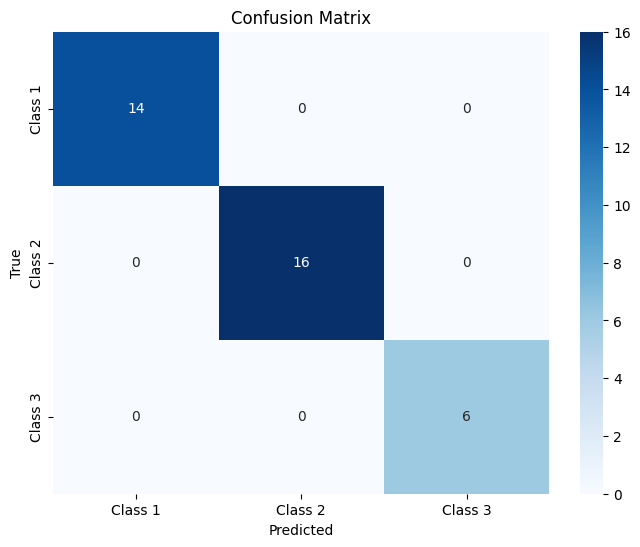

In [ ]:
knn_model = KNN(k=10)
knn_model.fit(X_train, y_train)

y_predicted = knn_model.predict(X_test)

print(f"Accuracy: {knn_model.score(y_predicted, y_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()